In [3]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import os
import math
from score_matching import SM, keep_grad
from data_structures import MultivariateNormal2

In [2]:
import torch

In [2]:
def plot_all(var, file_in, folder='', filename=None):
    dfs = [pd.read_csv(f'{file_in}{epoch}.csv') for epoch in range(10)]
    fig, axs = plt.subplots(2, 5)
    fig.set_size_inches(16, 6)
    fig.tight_layout()
    for i in range(10):
        x = dfs[i]['data_x']
        y = dfs[i]['data_y']
        colour = dfs[i][var]
        im = axs[math.floor(i / 5), i % 5].scatter(x, y, c=colour)
        fig.colorbar(im, ax=axs[math.floor(i / 5), i % 5]).set_label(var)
        axs[math.floor(i / 5), i % 5].set_title(f'epoch {i+1} {var}')
    
    directory = f'graphs/{folder}'
    if folder:
        if not os.path.isdir(directory):
            os.mkdir(directory)
    if filename is None:
        filename = f'{var}.jpg'
    plt.savefig(f'{directory}/{filename}')

## [presets]

run the following cells after having run score_matching.py on modes of 'density' and 'score' respectively

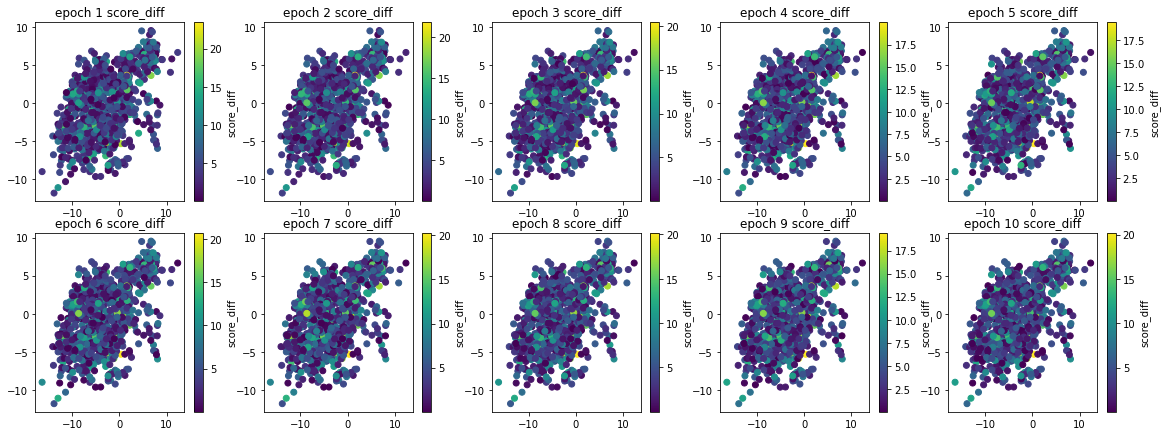

In [5]:
plot_all('score_diff', 'outputs/density/', 'density gbrbm')

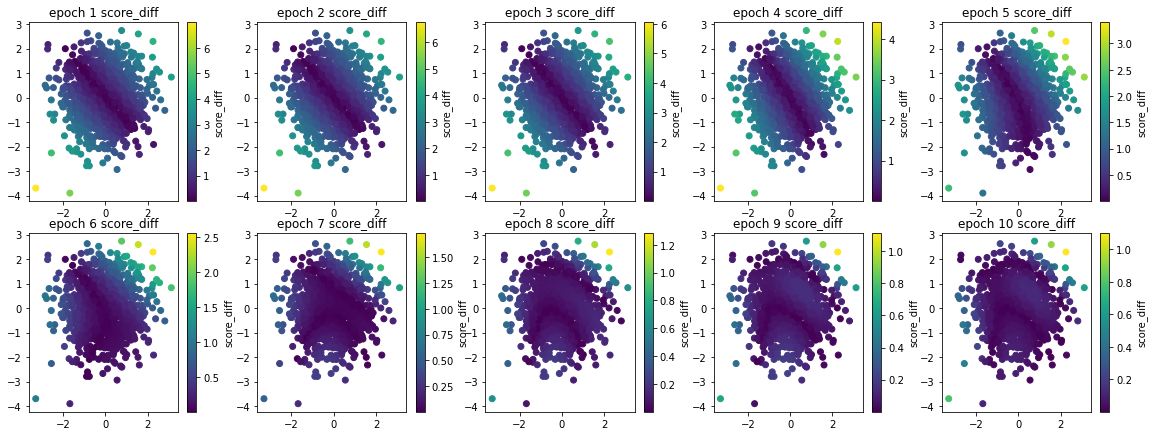

In [6]:
plot_all('score_diff', 'outputs/score/', 'score swish')

In [6]:
model = torch.load('model.pt')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
distr = MultivariateNormal2(torch.zeros(2), torch.eye(2))
data = torch.Tensor(np.stack((np.ravel(X), np.ravel(Y)), axis=1))
data.requires_grad_()
vector = model(data)
scores = keep_grad(vector.sum(), data)
theoretical = [distr.score_function(data_point) for data_point in data]
theoretical = torch.stack(theoretical)
score_diff = ((scores - theoretical) ** 2).sum(1).reshape(X.shape)

In [9]:
# visualising with score difference as fourth dimension - doesn't really workmost of the time since the score approximation is quite good everywhere
%matplotlib widget
model = torch.load('model.pt')
model.eval()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
zs = vector.detach().numpy()
Z = zs.reshape(X.shape)

# colour with score_diff
minn, maxx = score_diff.min(), score_diff.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='Reds')
m.set_array([])
fcolors = m.to_rgba(score_diff.detach().numpy())

ax.plot_surface(X, Y, np.exp(Z), rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('q(x)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'q(x)')

Text(0.5, 0, 'q(x)')

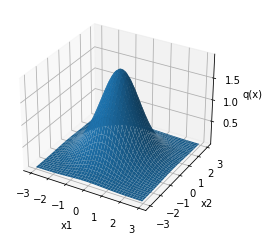

In [5]:
model = torch.load('model.pt')
model.eval()


x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
data = torch.Tensor(np.stack((np.ravel(X), np.ravel(Y)), axis=1))
zs = model(data).detach().numpy()
Z = zs.reshape(X.shape)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, np.exp(Z))

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('q(x)')